In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


labels = os.listdir('../fashion_mnist_images/train')
print(labels)
files = os.listdir('../fashion_mnist_images/train/0')
print(files[:10])
print(len(files))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
['0000.png', '0001.png', '0002.png', '0003.png', '0004.png', '0005.png', '0006.png', '0007.png', '0008.png', '0009.png']
6000


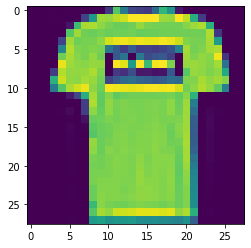

In [2]:

imageData = cv2.imread('../fashion_mnist_images/train/0/0000.png', cv2.IMREAD_UNCHANGED)
np.set_printoptions(linewidth=200)
plt.imshow(imageData)
plt.show()

In [3]:
# Loads a MNIST dataset
def loadMnistData(dataset, path):
  # Scan all the directories and create a list of labels
  labels = os.listdir(os.path.join(path, dataset))
  # Create lists for samples and labels
  X = []
  y = []
  # For each label folder
  for label in labels:
    # And for each image in given folde
    for file in os.listdir(os.path.join(path, dataset, label)):
      # Read the image
      image = cv2.imread(os.path.join(path, dataset, label, file), cv2.IMREAD_UNCHANGED)

      # And append it and a label to the lists
      X.append(image)
      
      y.append(label)
  # Convert the data to proper numpy arrays and return
  print('Data Loaded')
  return np.array(X), np.array(y).astype('uint8')

# MNIST dataset (train + test)
def createDataMnist(path):
  # Load both sets separately
  X, y = loadMnistData('train', path)
  X_test, y_test = loadMnistData('test', path)
  # And return all the data
  return X,y,X_test,y_test

In [4]:
X, y, X_test, y_test = createDataMnist('../fashion_mnist_images')

Data Loaded
Data Loaded


In [7]:
# Scale features
X = (X.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5
# print(X[0])

In [9]:
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
# print(X[0])

In [22]:
# shuffling the data so our model stop having bad practices in trianing or over fitting
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

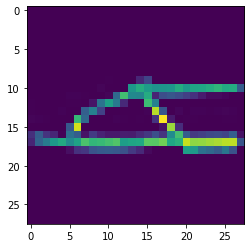

5


In [27]:
# Testing is the data Shuffled correctly
plt.imshow((X[3333].reshape(28,28)))
plt.show()
print(y[3333])